In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.options.display.max_columns = None

In [2]:
primer = pd.read_spss("../data/SPSS/201703_EnemduBDD_15anios.sav")
segundo = pd.read_spss("../data/SPSS/201706_EnemduBDD_15anio.sav.sav")
tercero = pd.read_spss("../data/SPSS/201709_EnemduBDD_15anios.sav")
cuarto = pd.read_spss("../data/SPSS/201712_EnemduBDD_15anios.sav")

# Pregunta 3
## Se desea saber cuál es el sueldo promedio que tienen los barrios de Guayaquil y Quito por cada trimestre/año

In [3]:
primer['trimestre']='Primero'
segundo['trimestre']='Segundo'
tercero['trimestre']='Tercero'
cuarto['trimestre']='Cuarto'

In [4]:
ciudad_maping={
    90150: 'Guayaquil',
    170150: 'Quito',
}

In [5]:
gyedf1=primer.loc[primer["ciudad"]==90150]
q1 = gyedf1["p66"].quantile(0.25)
q3 = gyedf1["p66"].quantile(0.75)
RI = q3-q1
gyedf1 = gyedf1.loc[(gyedf1["p66"]>q1-1.5*RI) & (gyedf1["p66"]<q3+1.5*RI)]
gyedf1["ciudad"] = gyedf1["ciudad"].replace(ciudad_maping,regex=True)

In [6]:
gyedf2=segundo.loc[segundo["ciudad"]==90150]
q1 = gyedf2["p66"].quantile(0.25)
q3 = gyedf2["p66"].quantile(0.75)
RI = q3-q1
gyedf2 = gyedf2.loc[(gyedf2["p66"]>q1-1.5*RI) & (gyedf2["p66"]<q3+1.5*RI)]
gyedf2["ciudad"] = gyedf2["ciudad"].replace(ciudad_maping,regex=True)

In [7]:
gyedf3=tercero.loc[tercero["ciudad"]==90150]
q1 = gyedf3["p66"].quantile(0.25)
q3 = gyedf3["p66"].quantile(0.75)
RI = q3-q1
gyedf3 = gyedf3.loc[(gyedf3["p66"]>q1-1.5*RI) & (gyedf3["p66"]<q3+1.5*RI)]
gyedf3["ciudad"] = gyedf3["ciudad"].replace(ciudad_maping,regex=True)

In [8]:
gyedf4=cuarto.loc[cuarto["ciudad"]==90150]
q1 = gyedf4["p66"].quantile(0.25)
q3 = gyedf4["p66"].quantile(0.75)
RI = q3-q1
gyedf4 = gyedf4.loc[(gyedf4["p66"]>q1-1.5*RI) & (gyedf4["p66"]<q3+1.5*RI)]
gyedf4["ciudad"] = gyedf4["ciudad"].replace(ciudad_maping,regex=True)

In [9]:
uiodf1=primer.loc[primer["ciudad"]==170150]
q1 = uiodf1["p66"].quantile(0.25)
q3 = uiodf1["p66"].quantile(0.75)
RI = q3-q1
uiodf1 = uiodf1.loc[(uiodf1["p66"]>q1-1.5*RI) & (uiodf1["p66"]<q3+1.5*RI)]
uiodf1["ciudad"] = uiodf1["ciudad"].replace(ciudad_maping,regex=True)

In [10]:
uiodf2=segundo.loc[segundo["ciudad"]==170150]
q1 = uiodf2["p66"].quantile(0.25)
q3 = uiodf2["p66"].quantile(0.75)
RI = q3-q1
uiodf2 = uiodf2.loc[(uiodf2["p66"]>q1-1.5*RI) & (uiodf2["p66"]<q3+1.5*RI)]
uiodf2["ciudad"] = uiodf2["ciudad"].replace(ciudad_maping,regex=True)

In [11]:
uiodf3=tercero.loc[tercero["ciudad"]==170150]
q1 = uiodf3["p66"].quantile(0.25)
q3 = uiodf3["p66"].quantile(0.75)
RI = q3-q1
uiodf3 = uiodf3.loc[(uiodf3["p66"]>q1-1.5*RI) & (uiodf3["p66"]<q3+1.5*RI)]
uiodf3["ciudad"] = uiodf3["ciudad"].replace(ciudad_maping,regex=True)

In [12]:
uiodf4=cuarto.loc[cuarto["ciudad"]==170150]
q1 = uiodf4["p66"].quantile(0.25)
q3 = uiodf4["p66"].quantile(0.75)
RI = q3-q1
uiodf4 = uiodf4.loc[(uiodf4["p66"]>q1-1.5*RI) & (uiodf4["p66"]<q3+1.5*RI)]
uiodf4["ciudad"] = uiodf4["ciudad"].replace(ciudad_maping,regex=True)

In [13]:
gye_sector_mapping = {
    '001': 'AYACUCHO',
    '002': 'BOLÍVAR',
    '003': 'CARBO',
    '004': 'FEBRES CORDERO',
    '005': 'GARCÍA MORENO',
    '006': 'LETAMENDI',
    '007': 'NUEVE DE OCTUBRE',
    "008": "OLMEDO",
    '009': 'ROCA',
    '010': 'ROCAFUERTE',
    '011': 'SUCRE',
    '012': 'TARQUI',
    '013': 'URDANETA',
    '014': 'XIMENA',
    '015': 'PASCUALES',
}
uio_sector_mapping = {
    '001': 'BELISARIO QUEVEDO',
    '002': 'CARCELÉN',
    '003': 'CENTRO HISTÓRICO',
    '004': 'COCHAPAMBA',
    '005': 'COMITÉ DEL PUEBLO',
    '006': 'COTOCOLLAO',
    '007': 'CHILIBULO',
    "008": "CHILLOGALLO",
    '009': 'CHIMBACALLE',
    '010': 'EL CONDADO',
    '011': 'GUAMANÍ',
    '012': 'IÑAQUITO',
    '013': 'ITCHIMBIA',
    '014': 'JIPIJAPA',
    '015': 'KENNEDY',
    '016': 'LA ARGELIA',
    '017': 'LA CONCEPCIÓN',
    '018': 'LA ECUATORIANA',
    '019': 'LA FERROVIARIA',
    '020': 'LA LIBERTAD',
    '021': 'LA MAGDALENA',
    '022': 'LA MENA',
    "023": "MARISCAL SUCRE",
    '024': 'PONCEANO',
    '025': 'PUENGASÍ',
    '026': 'QUITUMBE',
    '027': 'RUMIPAMBA',
    '028': 'SAN BARTOLO',
    '029': 'SAN ISIDRO DEL INCA',
    '030': 'SAN JUAN',
    '031': 'SOLANDA',
    '032': 'TURUBAMBA',
    '037': 'TURUBAMBA',
}


In [14]:
gyedf1["parroquia"] = gyedf1["sector"].replace(gye_sector_mapping,regex=True)
gyedf2["parroquia"] = gyedf2["sector"].replace(gye_sector_mapping,regex=True)
gyedf3["parroquia"] = gyedf3["sector"].replace(gye_sector_mapping,regex=True)
gyedf4["parroquia"] = gyedf4["sector"].replace(gye_sector_mapping,regex=True)
#
uiodf1["parroquia"] = uiodf1["sector"].replace(uio_sector_mapping,regex=True)
uiodf2["parroquia"] = uiodf2["sector"].replace(uio_sector_mapping,regex=True)
uiodf3["parroquia"] = uiodf3["sector"].replace(uio_sector_mapping,regex=True)
uiodf4["parroquia"] = uiodf4["sector"].replace(uio_sector_mapping,regex=True)

In [15]:
gyedf1=gyedf1.loc[:, ['parroquia', 'p66','trimestre','ciudad']]
gyedf2=gyedf2.loc[:, ['parroquia', 'p66','trimestre','ciudad']]
gyedf3=gyedf3.loc[:, ['parroquia', 'p66','trimestre','ciudad']]
gyedf4=gyedf4.loc[:, ['parroquia', 'p66','trimestre','ciudad']]
#
uiodf1=uiodf1.loc[:, ['parroquia', 'p66','trimestre','ciudad']]
uiodf2=uiodf2.loc[:, ['parroquia', 'p66','trimestre','ciudad']]
uiodf3=uiodf3.loc[:, ['parroquia', 'p66','trimestre','ciudad']]
uiodf4=uiodf4.loc[:, ['parroquia', 'p66','trimestre','ciudad']]

In [18]:
gyeUIOdf= pd.concat([gyedf1,gyedf2,gyedf3,gyedf4,uiodf1,uiodf2,uiodf3,uiodf4]).reset_index(drop=True)
gyeUIOdf.dropna(subset=['p66'],inplace=True)
#UIOdf = pd.concat([]).reset_index(drop=True)

In [19]:
gyeUIOdf['ciudad'].value_counts()

Guayaquil    5204
Quito        4578
Name: ciudad, dtype: int64

In [20]:
gyeUIOgroup=gyeUIOdf.groupby(["ciudad","trimestre","parroquia"])["p66"].mean().reset_index()
#UIOgroup=UIOdf.groupby(["parroquia","trimestre"])["p66"].mean().reset_index()

In [21]:
gyeUIOgroup

,ciudad,trimestre,parroquia,p66
0,Guayaquil,Cuarto,AYACUCHO,371.257576
1,Guayaquil,Cuarto,BOLÍVAR,407.716216
2,Guayaquil,Cuarto,CARBO,411.095652
3,Guayaquil,Cuarto,FEBRES CORDERO,352.152174
4,Guayaquil,Cuarto,GARCÍA MORENO,384.736434
...,...,...,...,...
90,Quito,Tercero,COCHAPAMBA,738.672131
91,Quito,Tercero,COMITÉ DEL PUEBLO,614.320312
92,Quito,Tercero,COTOCOLLAO,851.692308
93,Quito,Tercero,EL CONDADO,727.173913


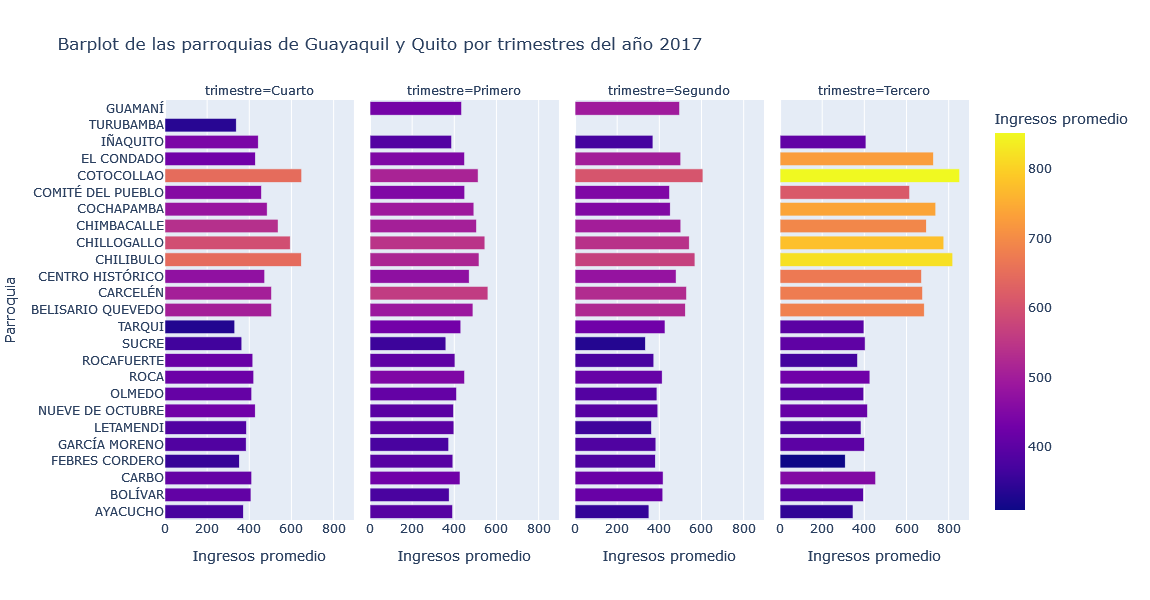

In [26]:
fig = px.bar(gyeUIOgroup, x='p66', y='parroquia',facet_col='trimestre',title='Barplot de las parroquias de Guayaquil y Quito por trimestres del año 2017 ',
                   labels={'p66':'Ingresos promedio','parroquia':'Parroquia'},orientation='h',color="p66", height=600,barmode='group')

fig.update_traces(width=0.8) 

fig.show()

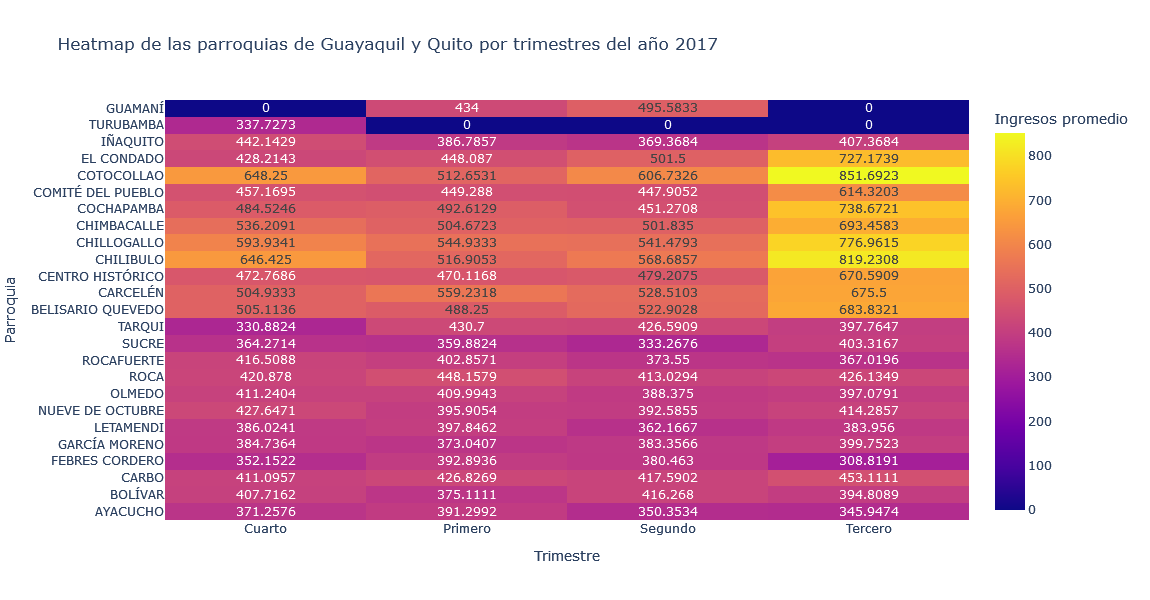

In [59]:
fig = px.density_heatmap(gyeUIOgroup, z='p66', y='parroquia',x='trimestre',title='Heatmap de las parroquias de Guayaquil y Quito por trimestres del año 2017 ',
                  height=600, text_auto=True)

fig.update_layout(
    xaxis=dict(title='Trimestre'),
    yaxis=dict(title='Parroquia'),
    coloraxis_colorbar=dict(title='Ingresos promedio')
)

fig.show()
